### Where to Start with Machine Learning?

This is an honestly difficult question - and you'll see a variety of different approaches. Some start "bottom-up", meaning one tries to learn all of the components of machine learning before actually attempting it. Others start "top-down", meaning one runs machine learning programs or projects before understanding much of how it works, and then tries to understand the components from the most general "down" to the highly specific.

We will tend more towards the top-down approach, but inject focus on specific concepts that are both technical and part of the machine learning terminology. Machine learning involves the fields of applied mathematics, computer science, statistics, information theory, and neuroscience - and that's at a minimum! So, be **patient** with yourself as you take your first steps into this interesting and challenging world. There is a great deal to learn, explore and refine.

Anyways, it would seem a good idea to start with the idea of **learning** before attempting anything further. What is "learning" for a computer (e.g., a machine)?

The basic concept is that *in order to learn there must be:  
* a **target** (like a learning goal or task)
* **training** on target samples
* **testing** performance on new samples 
* a **cost**, also called **loss**, for correction/direction 

Let's say we want a machine learning program that can tell if an image contains a dog or a cat. This is our **target**, and we want to achieve this goal with as high accuracy (little error) as possible. We will **train** our program on sample images of dogs and cats that we have pre-labeled. After training, we will **test** our program (also called a **model**) on new sample images of dogs and cats that we have not yet shown our program. During both the traning and testing processes, we must help our program learn by applying **cost**, or **loss**, when it makes a mistake. Conceptually, this not unlike a classic education model you find at school. 

Let's have a look at how this all works in a very basic ML program (adapted from: )



In [252]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [253]:
# Parameters# Param 
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [254]:
# Training Data# Train 

train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [255]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

In [256]:
# Construct a linear model to predict output of Y given X
Y_pred = tf.add(tf.multiply(X, W), b)

In [257]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(Y_pred-Y, 2))/(n_samples)
# Gradient descent applies our cost/loss function for us
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [258]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.173283219 W= 0.301377 b= 0.412392
Epoch: 0100 cost= 0.169117048 W= 0.295125 b= 0.457965
Epoch: 0150 cost= 0.165865675 W= 0.2896 b= 0.498233
Epoch: 0200 cost= 0.163328290 W= 0.284718 b= 0.533812
Epoch: 0250 cost= 0.161348194 W= 0.280405 b= 0.565249
Epoch: 0300 cost= 0.159803152 W= 0.276594 b= 0.593026
Epoch: 0350 cost= 0.158597633 W= 0.273227 b= 0.617569
Epoch: 0400 cost= 0.157657087 W= 0.270251 b= 0.639255
Epoch: 0450 cost= 0.156923354 W= 0.267622 b= 0.658416
Epoch: 0500 cost= 0.156350985 W= 0.265299 b= 0.675348
Epoch: 0550 cost= 0.155904606 W= 0.263247 b= 0.690307
Epoch: 0600 cost= 0.155556455 W= 0.261434 b= 0.703525
Epoch: 0650 cost= 0.155285001 W= 0.259831 b= 0.715205
Epoch: 0700 cost= 0.155073330 W= 0.258415 b= 0.725524
Epoch: 0750 cost= 0.154908404 W= 0.257164 b= 0.734642
Epoch: 0800 cost= 0.154779837 W= 0.256059 b= 0.742698
Epoch: 0850 cost= 0.154679686 W= 0.255082 b= 0.749816
Epoch: 0900 cost= 0.154601738 W= 0.254219 b= 0.756106
Epoch: 0950 cost= 0.154540986 

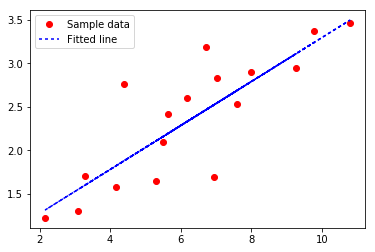

In [259]:

# Start training# Start 
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Plot sample data
    plt.plot(train_X, train_Y, 'ro', label='Sample data')
    
    #Plot linear prediction
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), dashes=[2, 2], color='blue', label='Fitted line')
    plt.legend()
    plt.show()

You can compare this 'toy' model with Google's widget here: https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise

What is essential to notice is how the cost updates the **weight** and **bias** of our predicted output for Y. This allows our program to "fit" the data by charting a line through the central relationship between X and Y samples.

Yet, our program is quite limited. A straight line can only separate very linear data. What if our data is non-linear (e.g. curved) or if has significant outliers (extreme values)? A linear cost function won't work - Let's see if we can fit a quadratic cost function to such a data collection. 

In [260]:
#reset our graph values
tf.reset_default_graph()

In [261]:
train_X = np.linspace(-np.pi, np.pi, 100)

train_Y = []
for _ in range(len(train_X)):
    train_Y = np.sin(train_X) + np.random.uniform(-0.5, 0.5, len(train_X))
    
n_samples = train_X.shape[0]

In [262]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

In [263]:
# Construct a polynomial model to predict output of Y given X
Y_pred = X**2 + X*W + b
#Y_pred = tf.add(tf.add(tf.multiply(X, X), tf.multiply(X, W)), b)

In [264]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(Y_pred-Y, 2))/n_samples
# Gradient descent applies our cost/loss function for us
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [265]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 10.136187553 W= 0.224288 b= -2.73139
Epoch: 0100 cost= 9.745885849 W= 0.281384 b= -3.14527
Epoch: 0150 cost= 9.696566582 W= 0.283997 b= -3.29737
Epoch: 0200 cost= 9.690202713 W= 0.284319 b= -3.3533
Epoch: 0250 cost= 9.689440727 W= 0.284415 b= -3.37387
Epoch: 0300 cost= 9.689373970 W= 0.28445 b= -3.38144
Epoch: 0350 cost= 9.689377785 W= 0.284463 b= -3.38421
Epoch: 0400 cost= 9.689383507 W= 0.284467 b= -3.38523
Epoch: 0450 cost= 9.689386368 W= 0.284468 b= -3.38562
Epoch: 0500 cost= 9.689387321 W= 0.284469 b= -3.38577
Epoch: 0550 cost= 9.689387321 W= 0.284469 b= -3.38584
Epoch: 0600 cost= 9.689387321 W= 0.28447 b= -3.38585
Epoch: 0650 cost= 9.689387321 W= 0.28447 b= -3.38585
Epoch: 0700 cost= 9.689387321 W= 0.28447 b= -3.38585
Epoch: 0750 cost= 9.689387321 W= 0.28447 b= -3.38585
Epoch: 0800 cost= 9.689387321 W= 0.28447 b= -3.38585
Epoch: 0850 cost= 9.689387321 W= 0.28447 b= -3.38585
Epoch: 0900 cost= 9.689387321 W= 0.28447 b= -3.38585
Epoch: 0950 cost= 9.689387321 W= 0.2

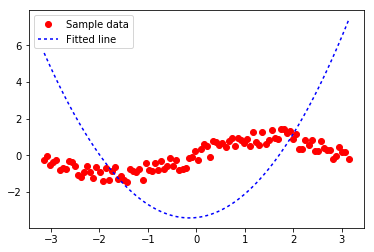

In [266]:

# Start training# Start 
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Plot sample data
    plt.plot(train_X, train_Y, 'ro', label='Sample data')
    #Plot linear prediction
    plt.plot(train_X, train_X * train_X + sess.run(W) * train_X + sess.run(b), dashes=[2, 2], color='blue', label='Fitted line')
    #plt.plot(train_X, sess.run(Y_pred), dashes=[2, 2], color='blue', label='Fitted line')
    
    # all this just to avoid duplicating legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.show()

This does a bad job of fitting. Visually, we can see it curve, but not responsively enough at all. Also, outliers in the data seem to begin pulling it once the values are far enough from 0. But, our cost function is barely changing, another sign that our function is **underfitting**. It is not capable of matching the curvature. **Overfitting**, on the other hand, is when our cost function is *too* complex for our data. This can often be shown as curving too much or in the wrong directions. 

In [267]:
#reset our graph 
tf.reset_default_graph()

In [268]:
train_X = np.linspace(-np.pi, np.pi, 100)

train_Y = []
for _ in range(len(train_X)):
    train_Y = np.sin(train_X) + np.random.uniform(-0.5, 0.5, len(train_X))
    
n_samples = train_X.shape[0]

In [269]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

In [270]:
# Construct a polynomial model to predict output of Y given X
Y_pred = X**3 + X*W + b
#Y_pred = tf.add(tf.add(tf.multiply(X, X), tf.multiply(X, W)), b)

In [271]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(Y_pred-Y, 2))/n_samples
# Gradient descent applies our cost/loss function for us
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [272]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 28.270498276 W= -5.59787 b= 0.791425
Epoch: 0100 cost= 27.614004135 W= -5.72999 b= 0.248086
Epoch: 0150 cost= 27.543407440 W= -5.73376 b= 0.0480831
Epoch: 0200 cost= 27.537574768 W= -5.7336 b= -0.0254695
Epoch: 0250 cost= 27.538148880 W= -5.73348 b= -0.0525168
Epoch: 0300 cost= 27.538730621 W= -5.73343 b= -0.0624626
Epoch: 0350 cost= 27.538993835 W= -5.73342 b= -0.0661198
Epoch: 0400 cost= 27.539096832 W= -5.73342 b= -0.0674649
Epoch: 0450 cost= 27.539134979 W= -5.73341 b= -0.0679593
Epoch: 0500 cost= 27.539150238 W= -5.7334 b= -0.0681414
Epoch: 0550 cost= 27.539155960 W= -5.7334 b= -0.0682085
Epoch: 0600 cost= 27.539157867 W= -5.7334 b= -0.0682331
Epoch: 0650 cost= 27.539157867 W= -5.7334 b= -0.0682419
Epoch: 0700 cost= 27.539159775 W= -5.7334 b= -0.0682453
Epoch: 0750 cost= 27.539157867 W= -5.7334 b= -0.0682465
Epoch: 0800 cost= 27.539157867 W= -5.7334 b= -0.0682473
Epoch: 0850 cost= 27.539157867 W= -5.7334 b= -0.0682473
Epoch: 0900 cost= 27.539157867 W= -5.7334 b= 

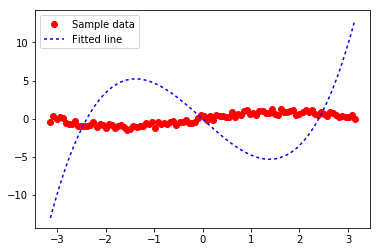

In [273]:

# Start training# Start 
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Plot sample data
    plt.plot(train_X, train_Y, 'ro', label='Sample data')
    #Plot linear prediction
    plt.plot(train_X, train_X**3 + sess.run(W) * train_X + sess.run(b), dashes=[2, 2], color='blue', label='Fitted line')
    #plt.plot(train_X, sess.run(Y_pred), dashes=[2, 2], color='blue', label='Fitted line')
    
    # all this just to avoid duplicating legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.show()

So now we are **overfitting**, where our cost function is over-responding to our data. We could fine-tune this by changing the learning rate (**try!**), but it turns out that polynomial expressions aren't the best method for our model. For instance, we even know the data samples features beforehand and are challenged to get a curve that fits it. Many times, we won't know such statistics on the data samples beforehand. If we square X, it can only be positive. Yet when we cube it, values get too large. 

### Nonlinear Activation Functions

Thankfully better methods have been discovered - namely applying "activation" functions to the input (X). These activation functions are generally **nonlinear**, and common examples are tanh, sigmoid and relu. See below

In [274]:
#reset our graph values
tf.reset_default_graph()

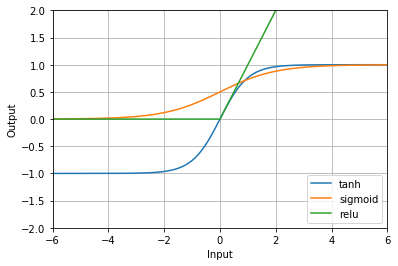

In [275]:
# psst another way of running Tensorflow without having to constantly call the graph into session 
# InteractiveSession needs calling just once
#sess =  tf.InteractiveSession()

x_ = np.linspace(-6,6,1000)
with tf.Session() as sess:
    plt.plot(x_, tf.nn.tanh(x_).eval(), label='tanh')
    plt.plot(x_, tf.nn.sigmoid(x_).eval(), label='sigmoid')
    plt.plot(x_, tf.nn.relu(x_).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')
plt.show()



In [278]:
#reset our graph values
tf.reset_default_graph()
#sess.close()

In [279]:
# Parameters# Param 
learning_rate = 0.02
training_epochs = 2000
display_step = 50

Epoch: 0050 cost= 0.204788342 W= 0.453449 b= -0.0992362
Epoch: 0100 cost= 0.186963737 W= 0.563904 b= -0.0319332
Epoch: 0150 cost= 0.182055518 W= 0.629901 b= -0.0101477
Epoch: 0200 cost= 0.179631695 W= 0.678434 b= -0.00249391
Epoch: 0250 cost= 0.178137094 W= 0.717013 b= -0.00014902
Epoch: 0300 cost= 0.177118078 W= 0.748948 b= 3.69213e-05
Epoch: 0350 cost= 0.176384360 W= 0.776047 b= -0.000670549
Epoch: 0400 cost= 0.175837442 W= 0.799432 b= -0.00172683
Epoch: 0450 cost= 0.175419882 W= 0.819856 b= -0.00288849
Epoch: 0500 cost= 0.175095141 W= 0.837862 b= -0.0040457
Epoch: 0550 cost= 0.174838945 W= 0.853853 b= -0.00515033
Epoch: 0600 cost= 0.174634546 W= 0.868135 b= -0.00618322
Epoch: 0650 cost= 0.174469888 W= 0.880954 b= -0.00713913
Epoch: 0700 cost= 0.174336165 W= 0.892507 b= -0.00801936
Epoch: 0750 cost= 0.174226835 W= 0.902953 b= -0.00882808
Epoch: 0800 cost= 0.174136892 W= 0.912428 b= -0.00957047
Epoch: 0850 cost= 0.174062535 W= 0.921046 b= -0.0102521
Epoch: 0900 cost= 0.174000740 W= 0.

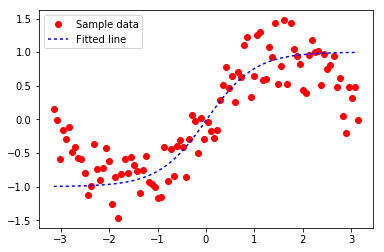

In [280]:
train_X = np.linspace(-np.pi, np.pi, 100)

train_Y = []
for _ in range(len(train_X)):
    train_Y = np.sin(train_X) + np.random.uniform(-0.5, 0.5, len(train_X))
    
n_samples = train_X.shape[0]
    
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# We're going to multiply our input by 10 values, creating an "inner layer"
# of n_neurons neurons.
#n_neurons = 10
W = tf.Variable(np.random.randn())

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(np.random.randn())

# Instead of just multiplying, we'll put our n_neuron multiplications through a non-linearity, the tanh function.
h = tf.nn.tanh(X*W + b)

Y_pred = h

#Y_pred = tf.reduce_sum(h, 1)

# Mean squared error
cost = tf.reduce_sum(tf.pow(Y_pred-Y, 2))/n_samples
# Gradient descent applies our cost/loss function for us
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()


# Start training# Start 
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Plot sample data
    plt.plot(train_X, train_Y, 'ro', label='Sample data')
    #Plot linear prediction
    plt.plot(train_X, np.tanh(sess.run(W) * train_X + sess.run(b)), dashes=[2, 2], color='blue', label='Fitted line')
    #plt.plot(train_X, sess.run(Y_pred), dashes=[2, 2], color='blue', label='Fitted line')
    
    # all this just to avoid duplicating legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    
    plt.show()

A better fit. A big reason why is that if we inspect the output of the tanh function, we can see that it squashes everything into a range of -1 to 1. 

However, it is still far from an ideal fit, as a single tanh **layer** is not able to fit the positive to negative left and right curves of our data. This is where deep networks - with many layers - can help. Stay tuned..

TO DO - add toy neural net to make activation func fit - try Mital's implementation (WITH BATCH)